In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
myPath = '/content/gdrive/MyDrive/IR-assignments/email-Eu-core.txt.gz'
myDatta= pd.read_csv(myPath,sep = " ")
print(myDatta)

         0    1
0        2    3
1        2    4
2        5    6
3        5    7
4        8    9
...    ...  ...
25565  420  143
25566  174  859
25567  440  460
25568   52  786
25569  506  932

[25570 rows x 2 columns]


# Representing in the term of Adjacency Matrix

In [ ]:
import collections
collections.Counter(myDatta)

Counter({'0': 1, '1': 1})

In [ ]:
datta_Uk = myDatta.copy()

In [ ]:
see = datta_Uk.columns.to_list()
print(see)

['0', '1']


In [ ]:
changeCols = {"0" : "Source", "1" :"Destination" }
datta_Uk = datta_Uk.rename(columns=changeCols)


In [ ]:
datta_Uk

,Source,Destination
0,2,3
1,2,4
2,5,6
3,5,7
4,8,9
...,...,...
25565,420,143
25566,174,859
25567,440,460
25568,52,786


In [ ]:
datta_Uk[datta_Uk['Destination'] == 160]

,Source,Destination
666,113,160
677,263,160
872,284,160
881,405,160
1353,300,160
...,...,...
24871,15,160
25251,179,160
25429,429,160
25499,621,160


In [ ]:
sourceNoodes = []
destoNoodes = []
sourceSet = set()
destoSet = set()
# Keep track of the Source Nodes 
for idx in range(datta_Uk.shape[0]):
  sourceNoodes.append(datta_Uk.loc[idx][0])
  destoNoodes.append(datta_Uk.loc[idx][1])
  sourceSet.add(datta_Uk.loc[idx][0])
  destoSet.add(datta_Uk.loc[idx][1])


In [ ]:
print("original Source Counter:",collections.Counter(sourceNoodes))
print("original Destination Counter :",collections.Counter(destoNoodes))


original Source Counter: Counter({160: 334, 82: 227, 121: 222, 107: 204, 86: 202, 62: 190, 13: 172, 249: 160, 183: 159, 434: 157, 5: 156, 211: 145, 129: 136, 377: 131, 84: 130, 21: 129, 114: 127, 333: 125, 87: 125, 166: 125, 533: 123, 142: 120, 820: 120, 83: 119, 105: 119, 283: 118, 282: 117, 58: 115, 63: 114, 64: 113, 252: 113, 424: 113, 115: 112, 405: 110, 128: 110, 6: 109, 212: 108, 96: 107, 17: 106, 420: 106, 169: 105, 106: 102, 165: 101, 280: 95, 494: 95, 411: 95, 971: 94, 133: 93, 419: 91, 473: 91, 4: 89, 81: 89, 932: 88, 301: 87, 303: 87, 2: 84, 409: 84, 65: 84, 498: 84, 254: 83, 44: 83, 170: 82, 74: 82, 209: 79, 232: 79, 366: 79, 438: 79, 295: 78, 28: 78, 404: 77, 329: 77, 285: 76, 549: 76, 93: 76, 546: 76, 393: 75, 41: 74, 172: 74, 14: 73, 215: 73, 113: 72, 11: 72, 340: 72, 180: 70, 157: 70, 300: 70, 116: 69, 493: 69, 450: 68, 42: 67, 137: 67, 141: 67, 173: 67, 495: 67, 7: 67, 290: 66, 342: 66, 859: 66, 167: 65, 474: 65, 367: 65, 23: 64, 269: 64, 412: 64, 440: 64, 210: 64, 371

In [ ]:
print("unique Source : ",len(sourceSet))
print("unique Destination : ", len(destoSet))

unique Source :  868
unique Destination :  991


# Edge List 

In [ ]:

def fillEdgeList(myEdgoListo):
  for idx in range(datta_Uk.shape[0]):
    edge_Items = []
    edge_Items.append(datta_Uk.loc[idx][0])
    edge_Items.append(datta_Uk.loc[idx][1])
    myEdgoListo.append(edge_Items)
  return myEdgoListo
  

In [ ]:
makeEdgeList = []
makeEdgeList=fillEdgeList(makeEdgeList)

In [ ]:
print("Edge List : ",makeEdgeList)

Edge List :  [[2, 3], [2, 4], [5, 6], [5, 7], [8, 9], [10, 11], [12, 13], [12, 14], [15, 16], [17, 18], [12, 19], [20, 21], [20, 22], [23, 24], [23, 25], [23, 26], [23, 27], [23, 28], [23, 29], [23, 30], [23, 31], [23, 32], [23, 33], [23, 34], [23, 35], [23, 36], [23, 37], [23, 38], [23, 39], [23, 40], [41, 42], [43, 44], [45, 46], [47, 48], [49, 50], [41, 51], [52, 53], [54, 55], [54, 56], [54, 57], [54, 58], [54, 59], [60, 61], [54, 54], [62, 63], [64, 65], [62, 4], [66, 67], [68, 69], [42, 41], [70, 71], [72, 21], [71, 70], [73, 74], [75, 76], [75, 48], [77, 78], [77, 79], [80, 81], [80, 68], [19, 62], [82, 83], [22, 21], [82, 84], [21, 72], [41, 85], [41, 86], [41, 87], [82, 86], [88, 89], [90, 91], [92, 20], [41, 93], [41, 94], [41, 95], [89, 96], [89, 88], [97, 98], [97, 99], [97, 100], [97, 101], [97, 102], [103, 104], [51, 41], [82, 105], [90, 106], [62, 107], [108, 109], [108, 66], [108, 110], [108, 111], [108, 112], [113, 114], [115, 116], [117, 118], [76, 119], [17, 120], [8

In [ ]:
print(len(makeEdgeList))

25570


# Adjacency Matrix

In [ ]:
# let us make a unique list to store the edges

mySet = set()
for i in sourceNoodes:
  mySet.add(i)
for j in destoNoodes:
  mySet.add(j)


In [ ]:
mySet=sorted(mySet)

In [ ]:
print(mySet)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
print("Number if vertices :",len(mySet))
#length of the vertices 

Number if vertices : 1005


In [ ]:
# Let us make a 2d matrix  of 1005 cross 1005 
myRows, myCols = (1005, 1005)
build2DMat = []
for row in range(myRows):
    buildCol= []
    for col in range(myCols):
        buildCol.append(0)
    build2DMat.append(buildCol)



In [ ]:
for idx in range(datta_Uk.shape[0]):
  currRowIdx = datta_Uk.loc[idx][0]
  currColIdx = datta_Uk.loc[idx][1]
  build2DMat[currRowIdx][currColIdx] = 1
  

In [ ]:
print(build2DMat[2][4])
print(build2DMat[420][143])
print(build2DMat[420][546])

1
1
0


# 28 points 

# Number of Nodes

In [ ]:
print("Number of Nodes : ",len(mySet))

Number of Nodes :  1005


# Number of Edges 

In [ ]:
print("Number of Edges :", len(makeEdgeList))

Number of Edges : 25570


# Avearage In Degree

In [ ]:
# functions to calculate the average indgree of a directed graph
numberOfNodes = len(mySet)
numberOfEdges = len(makeEdgeList)


In [ ]:
print(len(build2DMat))

1005


In [ ]:
def meinDegree():
  totalIn = 0
  inDegree = []
  for col in range(len(build2DMat)):
    currColSum = 0
    for row in range(len(build2DMat)):
      currColSum += build2DMat[row][col]
      totalIn += build2DMat[row][col]
    inDegree.append(currColSum)
  return totalIn,inDegree






In [ ]:
totalIndegree,inDegree=meinDegree()
print("Total In degree : ",totalIndegree)
print("Indegree Array : ",inDegree)

Total In degree :  25570
Indegree Array :  [32, 50, 77, 62, 74, 124, 93, 49, 34, 27, 41, 62, 46, 61, 55, 45, 68, 61, 46, 62, 64, 111, 13, 68, 26, 32, 30, 51, 96, 48, 55, 39, 32, 24, 23, 53, 43, 22, 29, 33, 48, 66, 50, 11, 92, 38, 68, 47, 46, 13, 15, 62, 18, 27, 42, 35, 39, 54, 103, 46, 39, 55, 179, 104, 136, 40, 20, 8, 39, 41, 16, 15, 6, 25, 76, 14, 22, 18, 23, 35, 61, 92, 121, 86, 48, 35, 154, 109, 30, 57, 24, 27, 38, 51, 37, 37, 97, 21, 23, 23, 36, 25, 16, 43, 32, 115, 128, 169, 37, 4, 9, 8, 17, 74, 109, 101, 68, 15, 24, 13, 14, 157, 21, 30, 33, 20, 28, 16, 132, 139, 36, 46, 52, 73, 21, 35, 27, 77, 29, 36, 33, 68, 99, 45, 11, 47, 14, 37, 14, 24, 32, 42, 60, 23, 38, 53, 20, 54, 43, 34, 212, 35, 51, 37, 39, 92, 127, 49, 63, 96, 87, 39, 70, 63, 65, 8, 25, 41, 29, 49, 68, 45, 28, 143, 72, 10, 20, 39, 26, 61, 29, 47, 19, 25, 42, 29, 23, 33, 19, 38, 34, 43, 6, 39, 28, 27, 44, 29, 52, 60, 77, 118, 101, 36, 50, 75, 26, 15, 43, 18, 14, 54, 56, 41, 10, 25, 46, 19, 22, 27, 17, 49, 77, 45, 34, 1

In [ ]:
#Average In degree
avgID = totalIndegree/numberOfNodes
print(avgID)

25.442786069651742


# Average outdegree in the graph

In [ ]:
def meoutDegree():
  totalOu = 0
  outDegree = []
  for row in range(len(build2DMat)):
    currColSum = 0
    for col in range(len(build2DMat)):
      currColSum += build2DMat[row][col]
      totalOu += build2DMat[row][col]
    outDegree.append(currColSum)
  return totalOu,outDegree

In [ ]:
totalout,outDegree = meoutDegree()

In [ ]:
print("Total Out degree : ",totalout)
print("Outdegree Array : ",outDegree)

Total Out degree :  25570
Outdegree Array :  [40, 1, 84, 56, 89, 156, 109, 67, 28, 33, 34, 72, 50, 172, 73, 37, 47, 106, 42, 58, 54, 129, 14, 64, 37, 18, 23, 45, 78, 46, 57, 43, 23, 19, 26, 44, 20, 32, 41, 16, 53, 74, 67, 8, 83, 38, 49, 37, 51, 10, 12, 48, 24, 31, 48, 36, 41, 60, 115, 44, 52, 63, 190, 114, 113, 84, 26, 7, 40, 60, 12, 14, 6, 29, 82, 18, 15, 17, 0, 35, 58, 89, 227, 119, 130, 28, 202, 125, 20, 53, 22, 29, 39, 76, 34, 40, 107, 24, 17, 19, 38, 21, 21, 33, 16, 119, 102, 204, 37, 4, 6, 1, 8, 72, 127, 112, 69, 13, 29, 1, 14, 222, 22, 29, 35, 24, 25, 20, 110, 136, 1, 50, 58, 93, 21, 23, 17, 67, 30, 30, 31, 67, 120, 41, 10, 61, 27, 45, 17, 26, 23, 31, 48, 46, 36, 63, 17, 70, 40, 33, 334, 26, 42, 42, 41, 101, 125, 65, 61, 105, 82, 28, 74, 67, 59, 9, 31, 44, 29, 39, 70, 54, 44, 159, 61, 22, 20, 49, 34, 38, 26, 56, 18, 24, 34, 33, 28, 24, 35, 45, 22, 51, 1, 0, 20, 14, 55, 14, 9, 79, 64, 145, 108, 45, 36, 73, 24, 19, 54, 2, 10, 43, 47, 47, 9, 20, 47, 1, 1, 27, 19, 58, 79, 54, 43, 20

In [ ]:
#Average out degree
avgOD = totalout/numberOfNodes
print(avgOD)

25.442786069651742


# Node with max In degree 

In [ ]:
print(inDegree)

[32, 50, 77, 62, 74, 124, 93, 49, 34, 27, 41, 62, 46, 61, 55, 45, 68, 61, 46, 62, 64, 111, 13, 68, 26, 32, 30, 51, 96, 48, 55, 39, 32, 24, 23, 53, 43, 22, 29, 33, 48, 66, 50, 11, 92, 38, 68, 47, 46, 13, 15, 62, 18, 27, 42, 35, 39, 54, 103, 46, 39, 55, 179, 104, 136, 40, 20, 8, 39, 41, 16, 15, 6, 25, 76, 14, 22, 18, 23, 35, 61, 92, 121, 86, 48, 35, 154, 109, 30, 57, 24, 27, 38, 51, 37, 37, 97, 21, 23, 23, 36, 25, 16, 43, 32, 115, 128, 169, 37, 4, 9, 8, 17, 74, 109, 101, 68, 15, 24, 13, 14, 157, 21, 30, 33, 20, 28, 16, 132, 139, 36, 46, 52, 73, 21, 35, 27, 77, 29, 36, 33, 68, 99, 45, 11, 47, 14, 37, 14, 24, 32, 42, 60, 23, 38, 53, 20, 54, 43, 34, 212, 35, 51, 37, 39, 92, 127, 49, 63, 96, 87, 39, 70, 63, 65, 8, 25, 41, 29, 49, 68, 45, 28, 143, 72, 10, 20, 39, 26, 61, 29, 47, 19, 25, 42, 29, 23, 33, 19, 38, 34, 43, 6, 39, 28, 27, 44, 29, 52, 60, 77, 118, 101, 36, 50, 75, 26, 15, 43, 18, 14, 54, 56, 41, 10, 25, 46, 19, 22, 27, 17, 49, 77, 45, 34, 18, 48, 23, 36, 11, 20, 20, 28, 46, 27, 47, 

In [ ]:
showMaxIn = inDegree.copy()
showMaxIn = sorted(showMaxIn,reverse = True)

In [ ]:
print(showMaxIn)

[212, 179, 169, 157, 154, 151, 143, 139, 136, 132, 128, 127, 124, 121, 120, 118, 118, 116, 115, 112, 111, 109, 109, 109, 106, 104, 104, 103, 101, 101, 99, 97, 96, 96, 96, 94, 93, 92, 92, 92, 92, 90, 90, 88, 87, 86, 86, 85, 85, 83, 83, 82, 80, 77, 77, 77, 77, 76, 76, 76, 75, 75, 74, 74, 74, 73, 73, 73, 72, 72, 71, 70, 70, 69, 68, 68, 68, 68, 68, 68, 68, 67, 66, 66, 66, 65, 65, 64, 63, 63, 63, 62, 62, 62, 62, 62, 61, 61, 61, 61, 61, 61, 61, 60, 60, 60, 58, 58, 57, 56, 55, 55, 55, 55, 54, 54, 54, 53, 53, 53, 53, 53, 53, 53, 52, 52, 52, 52, 51, 51, 51, 51, 51, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 38, 37, 37, 37, 37, 37, 37, 37, 37, 3

In [ ]:
inIndex = 0
for idx in range(len(inDegree)):
  item = inDegree[idx]
  if item == 212:
    inIndex = idx
    break



In [ ]:
print(inIndex)

160


# So the maximum indegree is 212 

# Max OutDegree in the Graph

In [ ]:
print(outDegree)

[40, 1, 84, 56, 89, 156, 109, 67, 28, 33, 34, 72, 50, 172, 73, 37, 47, 106, 42, 58, 54, 129, 14, 64, 37, 18, 23, 45, 78, 46, 57, 43, 23, 19, 26, 44, 20, 32, 41, 16, 53, 74, 67, 8, 83, 38, 49, 37, 51, 10, 12, 48, 24, 31, 48, 36, 41, 60, 115, 44, 52, 63, 190, 114, 113, 84, 26, 7, 40, 60, 12, 14, 6, 29, 82, 18, 15, 17, 0, 35, 58, 89, 227, 119, 130, 28, 202, 125, 20, 53, 22, 29, 39, 76, 34, 40, 107, 24, 17, 19, 38, 21, 21, 33, 16, 119, 102, 204, 37, 4, 6, 1, 8, 72, 127, 112, 69, 13, 29, 1, 14, 222, 22, 29, 35, 24, 25, 20, 110, 136, 1, 50, 58, 93, 21, 23, 17, 67, 30, 30, 31, 67, 120, 41, 10, 61, 27, 45, 17, 26, 23, 31, 48, 46, 36, 63, 17, 70, 40, 33, 334, 26, 42, 42, 41, 101, 125, 65, 61, 105, 82, 28, 74, 67, 59, 9, 31, 44, 29, 39, 70, 54, 44, 159, 61, 22, 20, 49, 34, 38, 26, 56, 18, 24, 34, 33, 28, 24, 35, 45, 22, 51, 1, 0, 20, 14, 55, 14, 9, 79, 64, 145, 108, 45, 36, 73, 24, 19, 54, 2, 10, 43, 47, 47, 9, 20, 47, 1, 1, 27, 19, 58, 79, 54, 43, 20, 35, 26, 39, 0, 17, 17, 23, 42, 20, 37, 15, 

In [ ]:
showMaxOut = outDegree.copy()
showMaxOut = sorted(showMaxOut,reverse = True)

In [ ]:
print(showMaxOut)

[334, 227, 222, 204, 202, 190, 172, 160, 159, 157, 156, 145, 136, 131, 130, 129, 127, 125, 125, 125, 123, 120, 120, 119, 119, 118, 117, 115, 114, 113, 113, 113, 112, 110, 110, 109, 108, 107, 106, 106, 105, 102, 101, 95, 95, 95, 94, 93, 91, 91, 89, 89, 88, 87, 87, 84, 84, 84, 84, 83, 83, 82, 82, 79, 79, 79, 79, 78, 78, 77, 77, 76, 76, 76, 76, 75, 74, 74, 73, 73, 72, 72, 72, 70, 70, 70, 69, 69, 68, 67, 67, 67, 67, 67, 67, 66, 66, 66, 65, 65, 65, 64, 64, 64, 64, 64, 64, 63, 63, 61, 61, 61, 60, 60, 59, 59, 59, 58, 58, 58, 58, 58, 57, 57, 56, 56, 56, 56, 55, 55, 55, 54, 54, 54, 54, 54, 53, 53, 53, 53, 52, 52, 52, 52, 52, 51, 51, 51, 51, 51, 50, 50, 50, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 38, 37, 37, 37, 37, 37, 37, 

In [ ]:
outIndex = 0
for idx in range(len(outDegree)):
  item = outDegree[idx]
  if item == 334:
    outIndex = idx
    break


In [ ]:
print(outIndex)

160


# Max out degree is 334

#The density of the network

In [ ]:
maxEdges = numberOfNodes*(numberOfNodes-1)
edges=len(makeEdgeList)
netDestiny = edges / maxEdges
print("The destiny of the network :", netDestiny)

The destiny of the network : 0.025341420388099344


# Degree Distribution of the Network

In [ ]:
print(inDegree)

[32, 50, 77, 62, 74, 124, 93, 49, 34, 27, 41, 62, 46, 61, 55, 45, 68, 61, 46, 62, 64, 111, 13, 68, 26, 32, 30, 51, 96, 48, 55, 39, 32, 24, 23, 53, 43, 22, 29, 33, 48, 66, 50, 11, 92, 38, 68, 47, 46, 13, 15, 62, 18, 27, 42, 35, 39, 54, 103, 46, 39, 55, 179, 104, 136, 40, 20, 8, 39, 41, 16, 15, 6, 25, 76, 14, 22, 18, 23, 35, 61, 92, 121, 86, 48, 35, 154, 109, 30, 57, 24, 27, 38, 51, 37, 37, 97, 21, 23, 23, 36, 25, 16, 43, 32, 115, 128, 169, 37, 4, 9, 8, 17, 74, 109, 101, 68, 15, 24, 13, 14, 157, 21, 30, 33, 20, 28, 16, 132, 139, 36, 46, 52, 73, 21, 35, 27, 77, 29, 36, 33, 68, 99, 45, 11, 47, 14, 37, 14, 24, 32, 42, 60, 23, 38, 53, 20, 54, 43, 34, 212, 35, 51, 37, 39, 92, 127, 49, 63, 96, 87, 39, 70, 63, 65, 8, 25, 41, 29, 49, 68, 45, 28, 143, 72, 10, 20, 39, 26, 61, 29, 47, 19, 25, 42, 29, 23, 33, 19, 38, 34, 43, 6, 39, 28, 27, 44, 29, 52, 60, 77, 118, 101, 36, 50, 75, 26, 15, 43, 18, 14, 54, 56, 41, 10, 25, 46, 19, 22, 27, 17, 49, 77, 45, 34, 18, 48, 23, 36, 11, 20, 20, 28, 46, 27, 47, 

In [ ]:
xIn= []
yIN = []
for idx in range(len(inDegree)):
  xIn.append(idx)
  yIN.append(inDegree[idx])


In [ ]:
print(xIn)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
print(yIN)

[32, 50, 77, 62, 74, 124, 93, 49, 34, 27, 41, 62, 46, 61, 55, 45, 68, 61, 46, 62, 64, 111, 13, 68, 26, 32, 30, 51, 96, 48, 55, 39, 32, 24, 23, 53, 43, 22, 29, 33, 48, 66, 50, 11, 92, 38, 68, 47, 46, 13, 15, 62, 18, 27, 42, 35, 39, 54, 103, 46, 39, 55, 179, 104, 136, 40, 20, 8, 39, 41, 16, 15, 6, 25, 76, 14, 22, 18, 23, 35, 61, 92, 121, 86, 48, 35, 154, 109, 30, 57, 24, 27, 38, 51, 37, 37, 97, 21, 23, 23, 36, 25, 16, 43, 32, 115, 128, 169, 37, 4, 9, 8, 17, 74, 109, 101, 68, 15, 24, 13, 14, 157, 21, 30, 33, 20, 28, 16, 132, 139, 36, 46, 52, 73, 21, 35, 27, 77, 29, 36, 33, 68, 99, 45, 11, 47, 14, 37, 14, 24, 32, 42, 60, 23, 38, 53, 20, 54, 43, 34, 212, 35, 51, 37, 39, 92, 127, 49, 63, 96, 87, 39, 70, 63, 65, 8, 25, 41, 29, 49, 68, 45, 28, 143, 72, 10, 20, 39, 26, 61, 29, 47, 19, 25, 42, 29, 23, 33, 19, 38, 34, 43, 6, 39, 28, 27, 44, 29, 52, 60, 77, 118, 101, 36, 50, 75, 26, 15, 43, 18, 14, 54, 56, 41, 10, 25, 46, 19, 22, 27, 17, 49, 77, 45, 34, 18, 48, 23, 36, 11, 20, 20, 28, 46, 27, 47, 

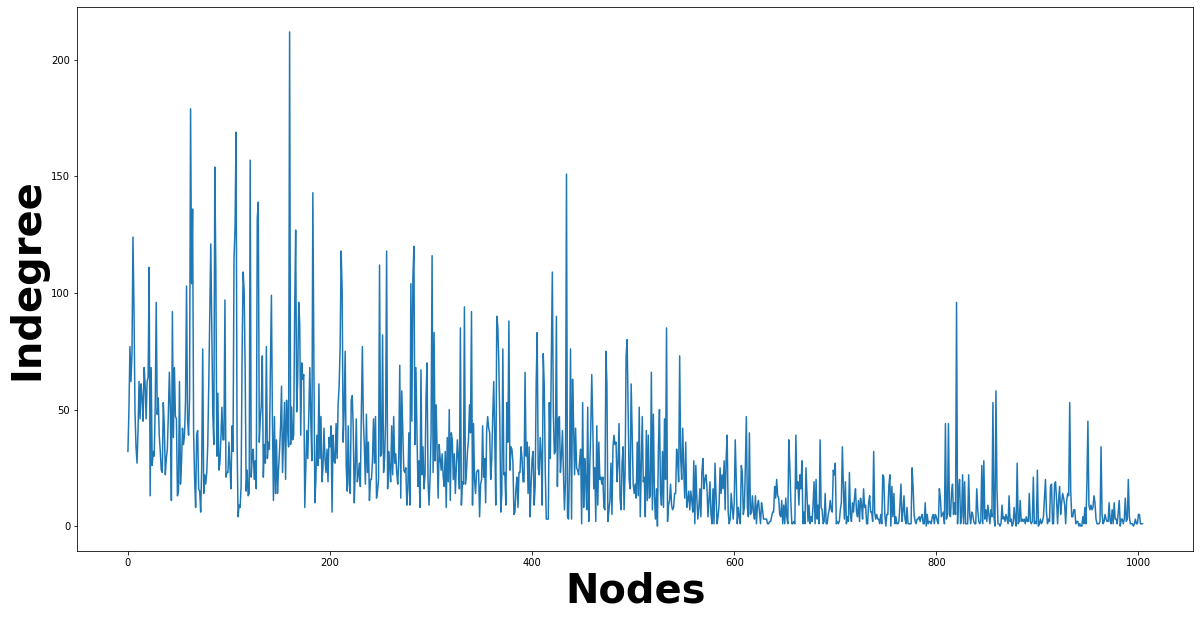

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(xIn, yIN)
plt.xlabel("Nodes",fontweight='bold',size=40)
plt.ylabel("Indegree",fontweight='bold',size=40)
plt.show()


In [ ]:
xOut= []
yOut = []
for idx in range(len(outDegree)):
  xOut.append(idx)
  yOut.append(outDegree[idx])


In [ ]:
print(xOut)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
print(yOut)

[40, 1, 84, 56, 89, 156, 109, 67, 28, 33, 34, 72, 50, 172, 73, 37, 47, 106, 42, 58, 54, 129, 14, 64, 37, 18, 23, 45, 78, 46, 57, 43, 23, 19, 26, 44, 20, 32, 41, 16, 53, 74, 67, 8, 83, 38, 49, 37, 51, 10, 12, 48, 24, 31, 48, 36, 41, 60, 115, 44, 52, 63, 190, 114, 113, 84, 26, 7, 40, 60, 12, 14, 6, 29, 82, 18, 15, 17, 0, 35, 58, 89, 227, 119, 130, 28, 202, 125, 20, 53, 22, 29, 39, 76, 34, 40, 107, 24, 17, 19, 38, 21, 21, 33, 16, 119, 102, 204, 37, 4, 6, 1, 8, 72, 127, 112, 69, 13, 29, 1, 14, 222, 22, 29, 35, 24, 25, 20, 110, 136, 1, 50, 58, 93, 21, 23, 17, 67, 30, 30, 31, 67, 120, 41, 10, 61, 27, 45, 17, 26, 23, 31, 48, 46, 36, 63, 17, 70, 40, 33, 334, 26, 42, 42, 41, 101, 125, 65, 61, 105, 82, 28, 74, 67, 59, 9, 31, 44, 29, 39, 70, 54, 44, 159, 61, 22, 20, 49, 34, 38, 26, 56, 18, 24, 34, 33, 28, 24, 35, 45, 22, 51, 1, 0, 20, 14, 55, 14, 9, 79, 64, 145, 108, 45, 36, 73, 24, 19, 54, 2, 10, 43, 47, 47, 9, 20, 47, 1, 1, 27, 19, 58, 79, 54, 43, 20, 35, 26, 39, 0, 17, 17, 23, 42, 20, 37, 15, 

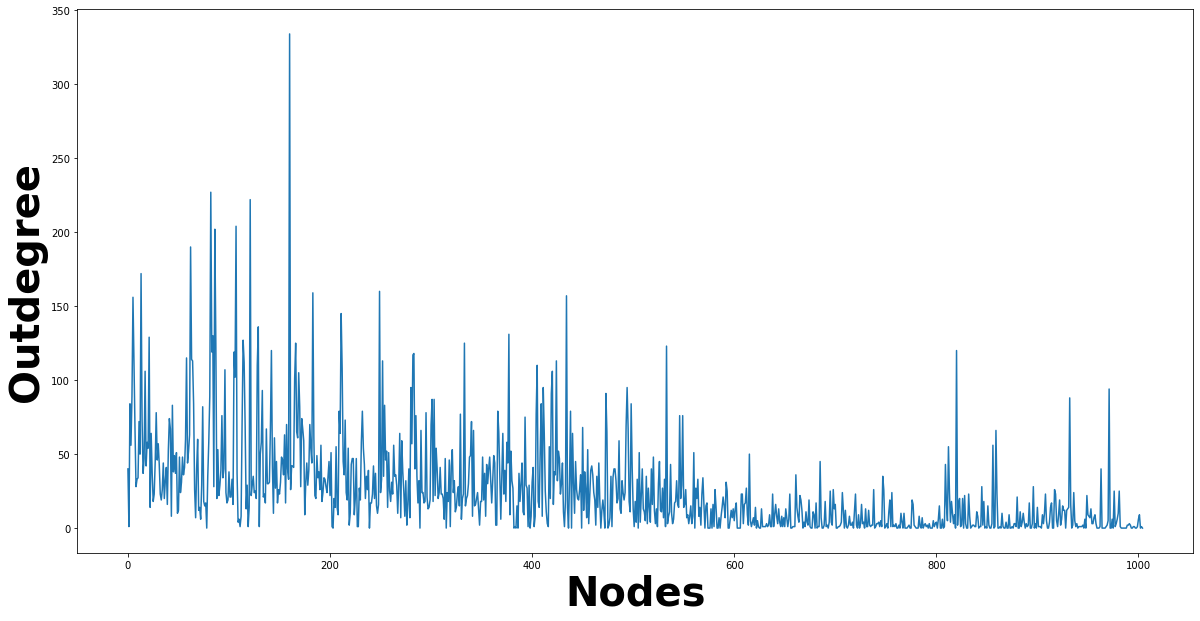

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(xOut, yOut)
plt.xlabel("Nodes",fontweight='bold',size=40)
plt.ylabel("Outdegree",fontweight='bold',size=40)
plt.show()

In [ ]:
# 2*/ kv * (kv-1)
#local clustering coefficient





#Local Clustering Coefficient 

In [ ]:
   d = [[1,1,1,0],[0,0,1,0],[0,0,0,0],[1,0,0,0]]


In [ ]:
# to calculate the degree and negibors of a node 
def make_k_neigh(num,datta):
  neigh = []
  k=0
  for col in range(len(datta)):
      if(datta[num][col] == 1):
        neigh.append(col)
        k+=1
      if(datta[col][num] == 1):
        if (datta[num][col] != 1):
          neigh.append(col)
        k+=1
  return k,neigh




In [ ]:
i,j = make_k_neigh(0,d)
print(i)
print(j)
#have to count the nv of the neigbours


5
[0, 1, 2, 3]


In [ ]:
nv_Val = []
k_Deg = []
for node in range(0,1005):
  nodeDeg, nodeNeig = make_k_neigh(node,build2DMat)
  k_Deg.append(nodeDeg)
  nv = 0
  for ele in nodeNeig:
    for other in nodeNeig:
      if(build2DMat[ele][other]==1):
        nv+=1
  nv_Val.append(nv)
  


In [ ]:
def fillLCC():
  fill = []
  for idx in range(len(nv_Val)):
    if (nv_Val[idx] ==0 or k_Deg[idx] == 1):
      val = 0
    else :
      val = nv_Val[idx] / ((k_Deg[idx] )* (k_Deg[idx]-1))
    fill.append(val)
  return fill


In [ ]:
print(k_Deg)

[72, 51, 161, 118, 163, 280, 202, 116, 62, 60, 75, 134, 96, 233, 128, 82, 115, 167, 88, 120, 118, 240, 27, 132, 63, 50, 53, 96, 174, 94, 112, 82, 55, 43, 49, 97, 63, 54, 70, 49, 101, 140, 117, 19, 175, 76, 117, 84, 97, 23, 27, 110, 42, 58, 90, 71, 80, 114, 218, 90, 91, 118, 369, 218, 249, 124, 46, 15, 79, 101, 28, 29, 12, 54, 158, 32, 37, 35, 23, 70, 119, 181, 348, 205, 178, 63, 356, 234, 50, 110, 46, 56, 77, 127, 71, 77, 204, 45, 40, 42, 74, 46, 37, 76, 48, 234, 230, 373, 74, 8, 15, 9, 25, 146, 236, 213, 137, 28, 53, 14, 28, 379, 43, 59, 68, 44, 53, 36, 242, 275, 37, 96, 110, 166, 42, 58, 44, 144, 59, 66, 64, 135, 219, 86, 21, 108, 41, 82, 31, 50, 55, 73, 108, 69, 74, 116, 37, 124, 83, 67, 546, 61, 93, 79, 80, 193, 252, 114, 124, 201, 169, 67, 144, 130, 124, 17, 56, 85, 58, 88, 138, 99, 72, 302, 133, 32, 40, 88, 60, 99, 55, 103, 37, 49, 76, 62, 51, 57, 54, 83, 56, 94, 7, 39, 48, 41, 99, 43, 61, 139, 141, 263, 209, 81, 86, 148, 50, 34, 97, 20, 24, 97, 103, 88, 19, 45, 93, 20, 23, 54, 3

In [ ]:
print(nv_Val)

[479, 596, 2407, 1753, 2599, 3036, 2031, 1296, 543, 573, 586, 1200, 918, 3328, 1256, 869, 1401, 2886, 831, 1272, 1364, 3983, 93, 1930, 547, 439, 523, 1231, 3239, 1116, 1582, 916, 577, 437, 517, 1236, 813, 506, 756, 528, 1091, 2190, 1623, 87, 2440, 764, 1817, 943, 1007, 93, 123, 1161, 158, 441, 1237, 906, 1163, 1691, 4100, 1317, 1038, 1241, 6165, 3998, 3563, 1289, 336, 31, 824, 1014, 165, 158, 27, 324, 1683, 156, 327, 226, 222, 553, 1523, 3332, 7641, 4250, 2095, 357, 5104, 4447, 440, 1420, 316, 374, 388, 1669, 637, 789, 2630, 293, 284, 370, 483, 264, 211, 945, 599, 4691, 4254, 7222, 526, 9, 68, 45, 142, 1970, 4787, 4272, 1942, 121, 241, 78, 118, 7894, 233, 448, 526, 354, 538, 234, 4712, 5017, 404, 1248, 1425, 2408, 175, 653, 478, 2296, 580, 560, 594, 1577, 4168, 754, 103, 1705, 219, 860, 140, 281, 614, 868, 1484, 1272, 1196, 1007, 178, 1431, 826, 594, 9891, 603, 749, 846, 725, 3397, 4769, 1178, 1450, 3782, 2246, 775, 2064, 1865, 1627, 72, 311, 597, 381, 910, 1556, 1094, 836, 5307, 1774,

In [ ]:

my_LCC = fillLCC()

In [ ]:
print(my_LCC)

[0.09370109546165885, 0.23372549019607844, 0.09343944099378881, 0.1269737795161524, 0.09842460046959024, 0.03886328725038402, 0.050022166395744055, 0.09715142428785607, 0.14357482813326283, 0.16186440677966102, 0.10558558558558559, 0.06733251038042869, 0.1006578947368421, 0.06156578363178926, 0.07726377952755906, 0.13083408611863898, 0.1068649885583524, 0.1041050429261958, 0.1085423197492163, 0.08907563025210084, 0.09879762422135303, 0.06943863319386331, 0.13247863247863248, 0.11161230626879481, 0.14004096262160778, 0.17918367346938777, 0.1897677793904209, 0.13497807017543859, 0.10760082386552389, 0.1276595744680851, 0.12725225225225226, 0.1379102679915688, 0.19427609427609427, 0.24197120708748615, 0.21981292517006804, 0.1327319587628866, 0.20814132104454686, 0.17679944095038436, 0.1565217391304348, 0.22448979591836735, 0.10801980198019802, 0.11253854059609456, 0.11958443854995579, 0.2543859649122807, 0.08013136288998358, 0.13403508771929826, 0.13387857353374594, 0.13525530694205393, 0

In [ ]:
print(my_LCC[449])

0


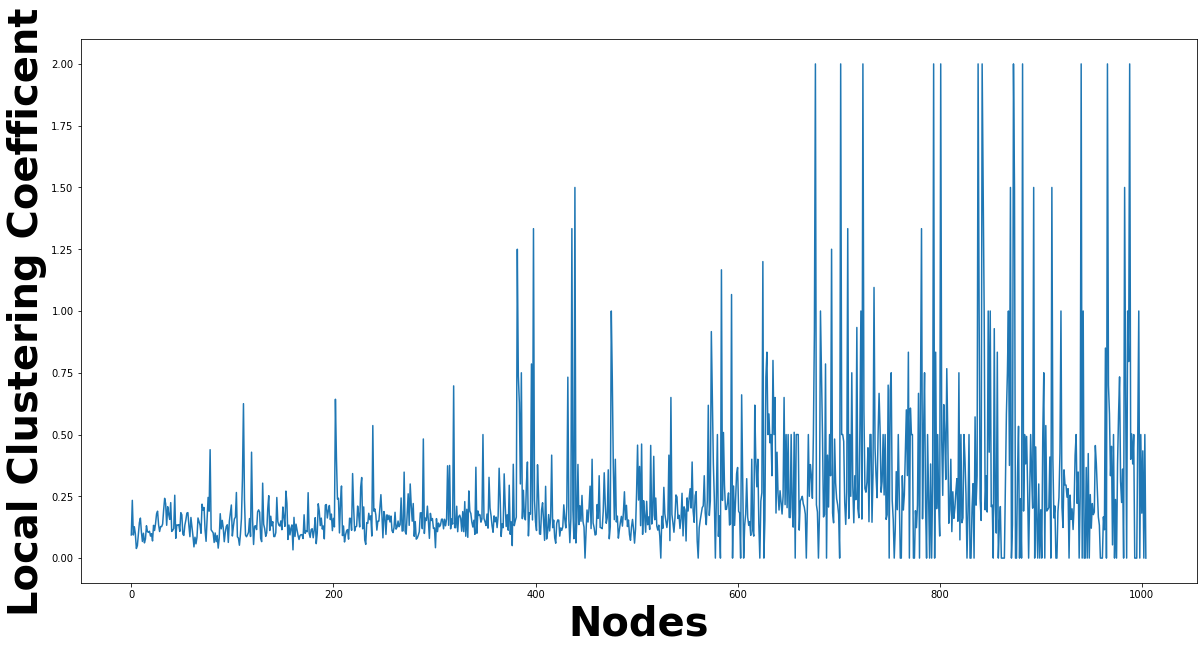

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(xOut, my_LCC)
plt.xlabel("Nodes",fontweight='bold',size=40)
plt.ylabel("Local Clustering Coefficent",fontweight='bold',size=40)
plt.show()